<a href="https://colab.research.google.com/github/akhil-1205/egd_assignment/blob/main/EGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing libraries
!pip install wbgapi

In [ ]:
import pandas as pd
import wbgapi

# List of countries
countries = ['USA', 'DEU', 'GBR', 'AUS', 'ISR', 'JPN', 'BRA', 'IDN', 'IND', 'SDN', 'UZB', 'SAU']

# List of indicators
indicators = {
    'SP.POP.DPND': 'Dependency Ratio',
    'SP.POP.TOTL': 'Population',
    'SE.TER.ENRR': 'Net Enrollment Rate in Tertiary Education',
    'BX.KLT.DINV.CD.WD': 'FDI',
    'NY.GNS.ICTR.ZS': 'Savings',
    'SP.DYN.LE00.IN': 'Life Expectancy',
    'NY.GDP.MKTP.CD': 'GDP'
}

data = pd.DataFrame()

for country_code in countries:
    # Get data for the current country and indicators
    country_data = wbgapi.data.DataFrame(list(indicators.keys()), economy=country_code, time=range(1980, 2022))

    # Transpose the DataFrame and rename columns
    country_data = country_data.transpose()
    country_data = country_data.rename(columns=indicators)

    # Add country column
    country_data['Country Code'] = country_code

    # Calculate GDP 5 years ago and GDP increase
    country_data['GDP 5 Years Ago'] = country_data['GDP'].shift(5)
    country_data['GDP Increase'] = (country_data["GDP"] - country_data["GDP 5 Years Ago"]) / country_data["GDP 5 Years Ago"]

    # Concatenate data for the current country with the main DataFrame
    data = pd.concat([data, country_data], ignore_index=True)

print(data.head())

series           FDI           GDP    Savings  \
0       1.674000e+10  2.857307e+12  22.202864   
1       2.568000e+10  3.207041e+12  23.366773   
2       2.123000e+10  3.343789e+12  21.790131   
3       1.150000e+10  3.634038e+12  19.795418   
4       2.523000e+10  4.037613e+12  21.911040   

series  Net Enrollment Rate in Tertiary Education  Life Expectancy  \
0                                       54.665390        73.609756   
1                                       56.981159        74.009756   
2                                       58.378410        74.360976   
3                                       58.837711        74.463415   
4                                       59.856270        74.563415   

series  Dependency Ratio   Population Country Code  GDP 5 Years Ago  \
0              50.946063  227225000.0          USA              NaN   
1              50.622332  229466000.0          USA              NaN   
2              50.446161  231664000.0          USA              NaN   


In [ ]:
data.isnull().sum()

series
FDI                                           12
GDP                                           34
Savings                                       66
Net Enrollment Rate in Tertiary Education    141
Life Expectancy                                0
Dependency Ratio                               0
Population                                     0
Country Code                                   0
GDP 5 Years Ago                               94
GDP Increase                                  94
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   FDI                                        492 non-null    float64
 1   GDP                                        470 non-null    float64
 2   Savings                                    438 non-null    float64
 3   Net Enrollment Rate in Tertiary Education  363 non-null    float64
 4   Life Expectancy                            504 non-null    float64
 5   Dependency Ratio                           504 non-null    float64
 6   Population                                 504 non-null    float64
 7   Country Code                               504 non-null    object 
 8   GDP 5 Years Ago                            410 non-null    float64
 9   GDP Increase                               410 non-null    float64
dtypes: float64(9), object(1)
m

In [ ]:
# data=data.rename(columns=indicators)
data

series,FDI,GDP,Savings,Net Enrollment Rate in Tertiary Education,Life Expectancy,Dependency Ratio,Population,Country Code,GDP 5 Years Ago,GDP Increase
0,1.674000e+10,2.857307e+12,22.202864,54.665390,73.609756,50.946063,227225000.0,USA,NaN,NaN
1,2.568000e+10,3.207041e+12,23.366773,56.981159,74.009756,50.622332,229466000.0,USA,NaN,NaN
2,2.123000e+10,3.343789e+12,21.790131,58.378410,74.360976,50.446161,231664000.0,USA,NaN,NaN
3,1.150000e+10,3.634038e+12,19.795418,58.837711,74.463415,50.224835,233792000.0,USA,NaN,NaN
4,2.523000e+10,4.037613e+12,21.911040,59.856270,74.563415,50.090132,235825000.0,USA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
499,1.014063e+09,7.149947e+11,30.259679,69.606110,77.160000,40.883361,34193122.0,SAU,7.418500e+11,-0.036200
500,1.214112e+10,8.465838e+11,34.624506,NaN,77.212000,40.074880,35018133.0,SAU,7.538645e+11,0.122992
501,3.079217e+09,8.385647e+11,32.854529,NaN,77.304000,39.425386,35827362.0,SAU,7.666059e+11,0.093867
502,1.621264e+09,7.342712e+11,24.584441,NaN,76.239000,39.738386,35997107.0,SAU,6.694844e+11,0.096771


In [ ]:
data['Countries'] = (data.index // 126) + 1
data.reset_index(drop=True, inplace=True)

In [ ]:
import numpy as np
data['PCGDP'] = data['GDP'] / data['Population']
data['PCGDP']=np.log(data['PCGDP'])
data

series,FDI,GDP,Savings,Net Enrollment Rate in Tertiary Education,Life Expectancy,Dependency Ratio,Population,Country Code,GDP 5 Years Ago,GDP Increase,Countries,PCGDP
0,1.674000e+10,2.857307e+12,22.202864,54.665390,73.609756,50.946063,227225000.0,USA,NaN,NaN,1,9.439449
1,2.568000e+10,3.207041e+12,23.366773,56.981159,74.009756,50.622332,229466000.0,USA,NaN,NaN,1,9.545104
2,2.123000e+10,3.343789e+12,21.790131,58.378410,74.360976,50.446161,231664000.0,USA,NaN,NaN,1,9.577327
3,1.150000e+10,3.634038e+12,19.795418,58.837711,74.463415,50.224835,233792000.0,USA,NaN,NaN,1,9.651423
4,2.523000e+10,4.037613e+12,21.911040,59.856270,74.563415,50.090132,235825000.0,USA,NaN,NaN,1,9.748074
...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.014063e+09,7.149947e+11,30.259679,69.606110,77.160000,40.883361,34193122.0,SAU,7.418500e+11,-0.036200,4,9.948006
500,1.214112e+10,8.465838e+11,34.624506,NaN,77.212000,40.074880,35018133.0,SAU,7.538645e+11,0.122992,4,10.093098
501,3.079217e+09,8.385647e+11,32.854529,NaN,77.304000,39.425386,35827362.0,SAU,7.666059e+11,0.093867,4,10.060735
502,1.621264e+09,7.342712e+11,24.584441,NaN,76.239000,39.738386,35997107.0,SAU,6.694844e+11,0.096771,4,9.923195


In [ ]:
data.drop(['GDP 5 Years Ago', 'GDP', 'Country Code'], axis=1, inplace=True) ##why did we drop Population????

In [ ]:
data.dropna(subset=['GDP Increase'], inplace=True)
#dropping rows which do not have target variable

In [ ]:
data.isnull().sum()

series
FDI                                            0
Savings                                       25
Net Enrollment Rate in Tertiary Education    116
Life Expectancy                                0
Dependency Ratio                               0
Population                                     0
GDP Increase                                   0
Countries                                      0
PCGDP                                          0
dtype: int64

In [ ]:
data['FDI_log'] = data['FDI'].apply(lambda x: np.log(x))
data.drop(['FDI'], axis=1, inplace=True)

In [ ]:
data['Population_log'] = data['Population'].apply(lambda x: np.log(x))
data.drop(['Population'], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


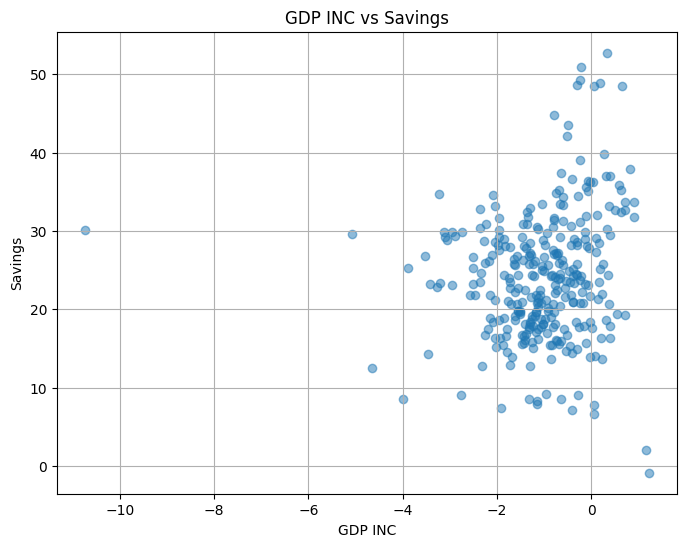

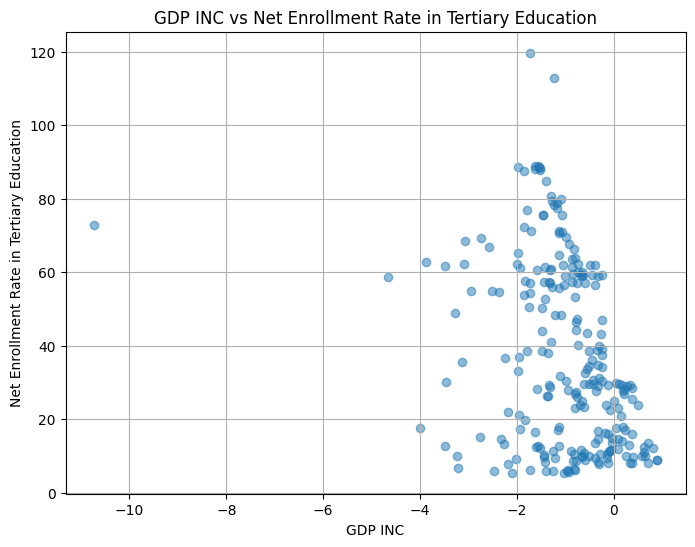

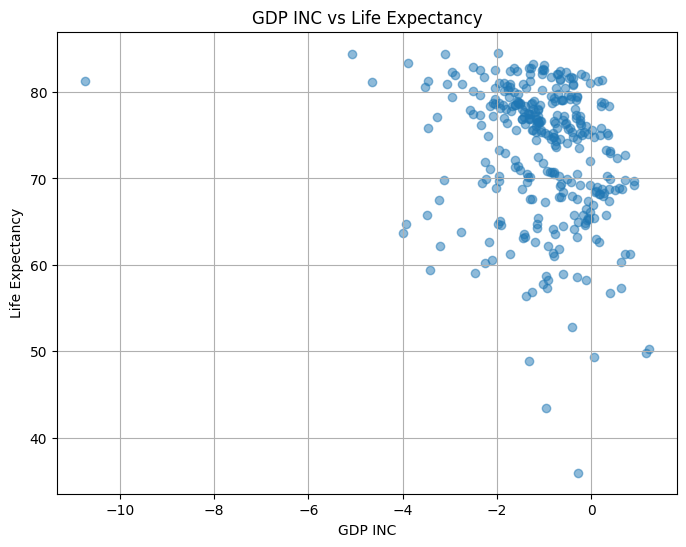

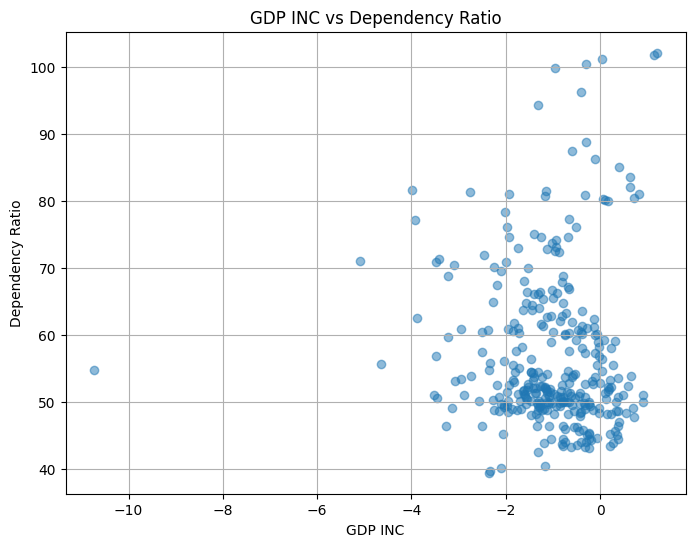

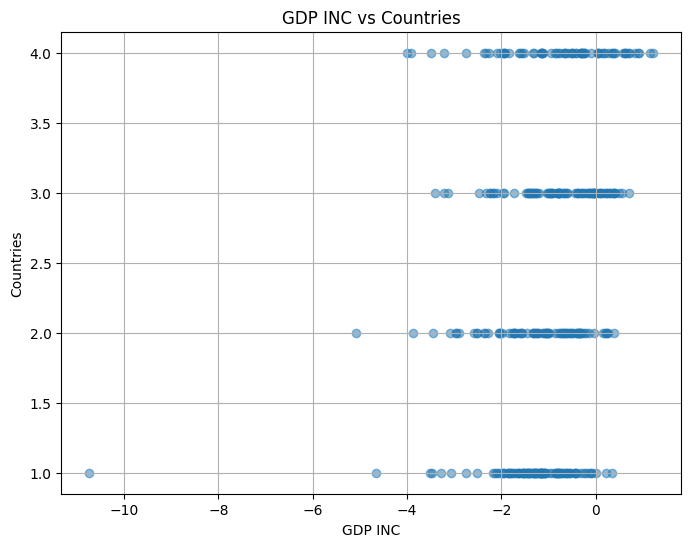

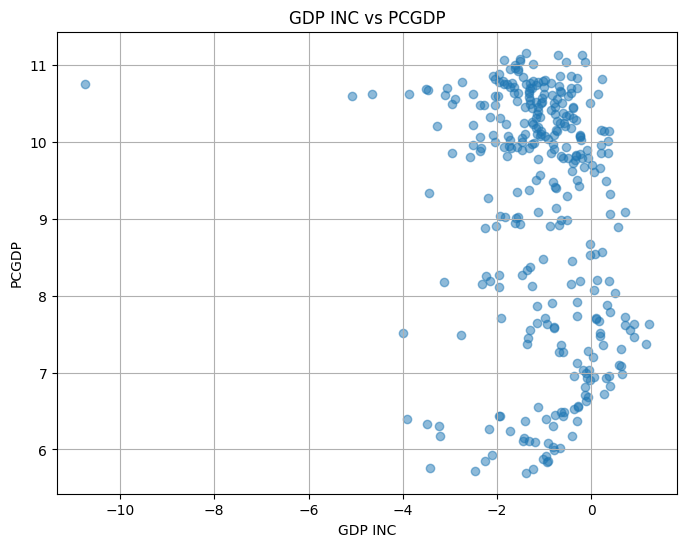

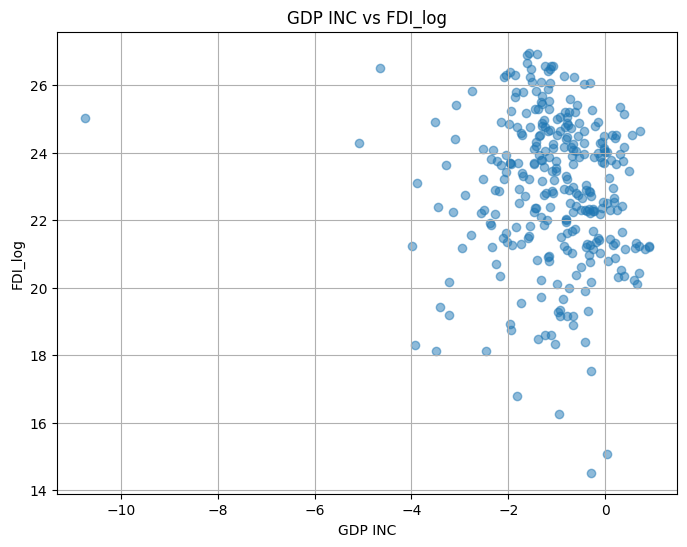

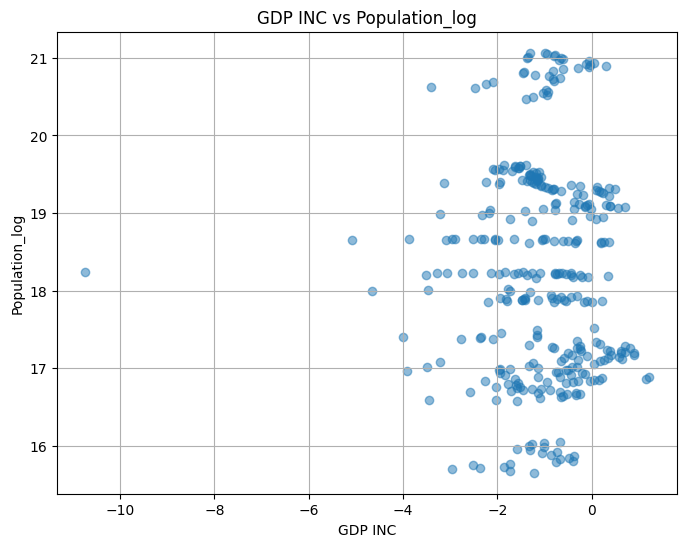

In [ ]:
import matplotlib.pyplot as plt

for column in data.columns:
    if column != 'GDP Increase':  # Skip plotting GDP against itself
        plt.figure(figsize=(8, 6))
        plt.scatter(np.log(data['GDP Increase']), data[column], alpha=0.5)
        plt.title(f'GDP INC vs {column}')
        plt.xlabel('GDP INC')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
numeric_columns = data.columns
from sklearn.preprocessing import OneHotEncoder
# Mean imputation for numerical columns
numeric_imputer = SimpleImputer(strategy='mean')
data = numeric_imputer.fit_transform(data)
#i dont know why sk learn is turning the dataframe into an array,,so i converted it back same with scaler also
df = pd.DataFrame(data,columns=numeric_columns)


In [ ]:

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize all the data
df_normalized = scaler.fit_transform(df)

# Convert the normalized data back to a DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=numeric_columns)

# Now df_normalized contains the normalized data for all columns


df_normalized

series,Savings,Net Enrollment Rate in Tertiary Education,Life Expectancy,Dependency Ratio,GDP Increase,Countries,PCGDP,FDI_log,Population_log
0,-0.324414,9.644575e-01,0.196880,-0.596485,0.229339,-1.298288,0.481871,0.081539,0.832893
1,-0.492291,1.021464e+00,0.203092,-0.604796,0.065331,-1.298288,0.508645,0.596985,0.839919
2,-0.413371,1.134704e+00,0.221431,-0.600730,0.108826,-1.298288,0.538269,0.912522,0.846715
3,-0.292241,1.238869e+00,0.221431,-0.568130,0.088782,-1.298288,0.578073,0.865988,0.853619
4,-0.398073,1.301691e+00,0.251899,-0.532544,0.009668,-1.298288,0.617022,0.992432,0.860799
...,...,...,...,...,...,...,...,...,...
405,0.858077,1.387728e+00,0.511793,-1.285640,-0.775314,1.349961,0.563748,-0.912351,-0.642041
406,1.379743,6.331713e-16,0.518100,-1.346607,-0.487019,1.349961,0.650584,0.183852,-0.623914
407,1.168203,6.331713e-16,0.529257,-1.395586,-0.539765,1.349961,0.631215,-0.421918,-0.606545
408,0.179796,6.331713e-16,0.400094,-1.371982,-0.534505,1.349961,0.548899,-0.705158,-0.602951


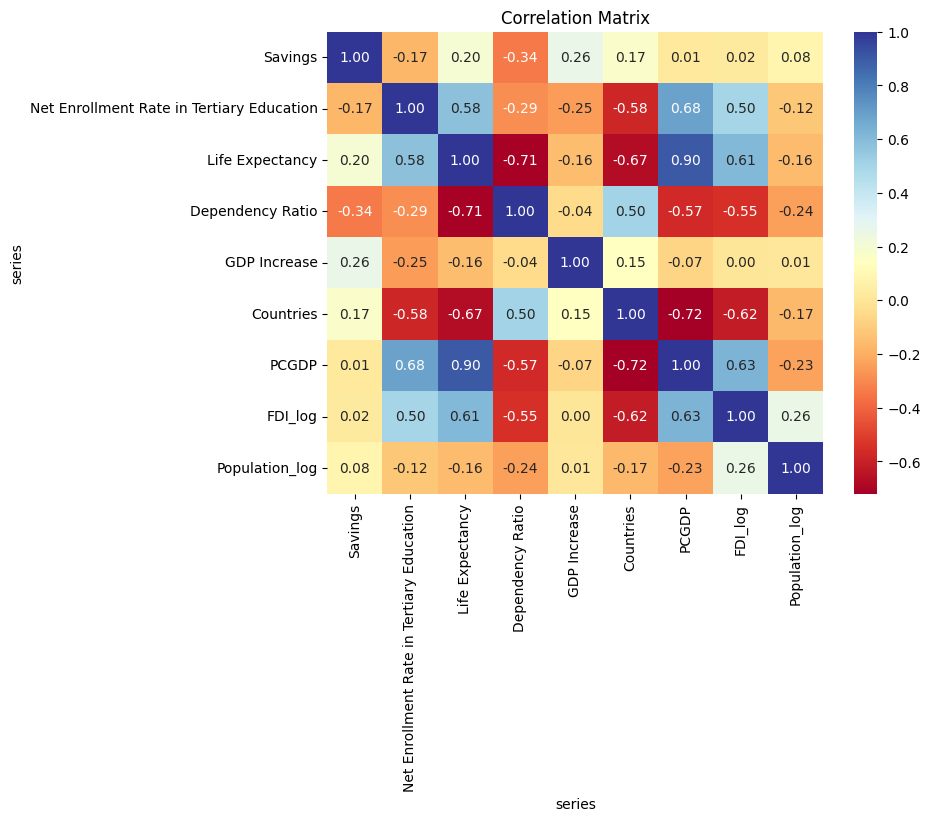

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df_normalized.corr()

# Visualize the correlation matrix as a heatmap with colors
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df_normalized=df_normalized.dropna()

In [ ]:
# Split data into features (X) and target variable (y)
X = df_normalized.drop(columns=['GDP Increase'])
y = df_normalized['GDP Increase']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=126)
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.7546950802492184
R-squared: 0.2865493819908391


In [ ]:
# Extract coefficients and feature names (if applicable)
coefficients = model.coef_
feature_names = X.columns

# Create DataFrame
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df


,Feature,Coefficient
0,Savings,0.317991
1,Net Enrollment Rate in Tertiary Education,-0.330460
2,Life Expectancy,-1.170388
3,Dependency Ratio,-0.218104
4,Countries,-0.032928
5,PCGDP,0.889336
6,FDI_log,0.182741
7,Population_log,-0.182010


In [ ]:
intercept = model.intercept_
print("Intercept:", intercept)

Intercept: 0.028261101305695886
